In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [1]:
import pandas as pd

spotify_df = pd.read_csv('file:///C:/Users/USER/OneDrive/Documents/top 100 streamed songs.csv')

# untuk menampilkan seluruh kolom
pd.set_option('display.max_columns', None)

print('top 5 from spotify dataset:\n', spotify_df.head())
print('size of the spotify dataset:\n', spotify_df.shape)


top 5 from spotify dataset:
                        id                                               name  \
0  4ZtFanR9U6ndgddUvNcjcG                            Good 4 U Olivia Rodrigo   
1  5fxyZf6m2xHeSrOzUfcJrq                 Stay The Kid LAROI & Justin Bieber   
2  5nujrmhLynf4yMoMtj8AQF                   Levitating Dua Lipa feat. DaBaby   
3  4iJyoBOLtHqaGxP12qzhQI  Peaches Justin Bieber feat. Daniel Caesar & Gi...   
4  1SC5rEoYDGUK4NfG82494W           Montero (Call Me By Your Name) Lil Nas X   

   duration  energy  key  loudness  mode  speechiness  acousticness  \
0      2.97   0.664    9    -5.044     1       0.1540       0.33500   
1      2.30   0.506    8   -11.275     1       0.0589       0.37900   
2      3.38   0.825    6    -3.787     0       0.0601       0.00883   
3      3.30   0.696    0    -6.181     1       0.1190       0.32100   
4      2.30   0.503    8    -6.725     0       0.2200       0.29300   

   instrumentalness  liveness  valence    tempo  danceability  

In [2]:
# Memeriksa data yang hilang
print(spotify_df.isna().sum())

# Menghapus data yang hilang
spotify_df = spotify_df.dropna()
# Memeriksa tipe data pada setiap kolom
print(spotify_df.dtypes)

id                  0
name                0
duration            0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
danceability        0
dtype: int64
id                   object
name                 object
duration            float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
danceability        float64
dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_14348\2137556257.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = spotify_df.quantile(0.25)
C:\Users\USER\AppData\Local\Temp\ipykernel_14348\2137556257.py:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = spotify_df.quantile(0.75)
C:\Users\USER\AppData\Local\Temp\ipykernel_14348\2137556257.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  spotify_df = spotify_df[~((spotify_df < (Q1 - 1.5 * IQR)) | (spotify_df > (

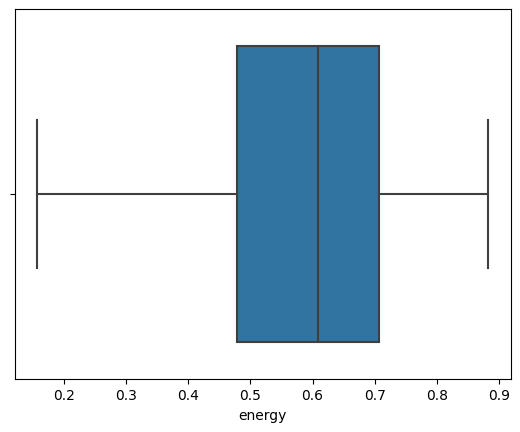

In [3]:
# Memeriksa outlier menggunakan metode boxplot
import seaborn as sns
sns.boxplot(x=spotify_df['energy'])

# Menghapus outlier
Q1 = spotify_df.quantile(0.25)
Q3 = spotify_df.quantile(0.75)
IQR = Q3 - Q1
spotify_df = spotify_df[~((spotify_df < (Q1 - 1.5 * IQR)) | (spotify_df > (Q3 + 1.5 * IQR))).any(axis=1)]


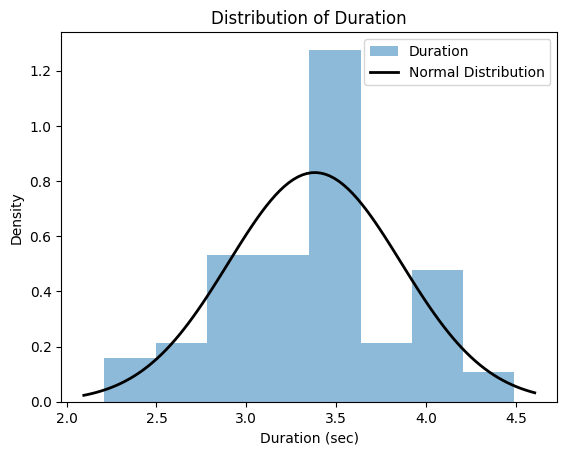

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Menghitung mean dan standard deviation kolom duration
mean = spotify_df['duration'].mean()
std = spotify_df['duration'].std()

# Menampilkan histogram kolom duration
plt.hist(spotify_df['duration'], bins=8, density=True, alpha=0.5, label='Duration')

# Menghitung kurva distribusi normal dari data duration
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Distribution of Duration')
plt.xlabel('Duration (sec)')
plt.ylabel('Density')
plt.legend()
plt.show()


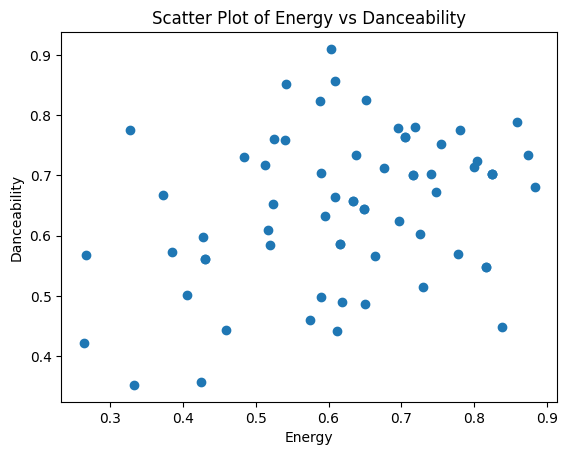

In [32]:
# Menampilkan scatter plot untuk hubungan antara energy dan danceability
plt.scatter(spotify_df['energy'], spotify_df['danceability'])
plt.title('Scatter Plot of Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14348\895896951.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = spotify_df.corr()


                  duration    energy       key  loudness      mode  \
duration          1.000000 -0.187397 -0.051075 -0.115763  0.252384   
energy           -0.187397  1.000000  0.019743  0.660132 -0.287520   
key              -0.051075  0.019743  1.000000 -0.074549 -0.172652   
loudness         -0.115763  0.660132 -0.074549  1.000000 -0.179177   
mode              0.252384 -0.287520 -0.172652 -0.179177  1.000000   
speechiness       0.044893  0.262378 -0.076617  0.152568 -0.105005   
acousticness      0.305143 -0.650679 -0.062474 -0.208809  0.256602   
instrumentalness  0.136096  0.139217 -0.057476  0.106093 -0.082643   
liveness         -0.348148  0.018420 -0.032576 -0.017743  0.053499   
valence          -0.096802  0.546404  0.220412  0.425212 -0.111974   
tempo             0.156298  0.108203 -0.208376 -0.116324  0.046646   
danceability     -0.189890  0.319862  0.253910  0.275537 -0.183586   

                  speechiness  acousticness  instrumentalness  liveness  \
duration      

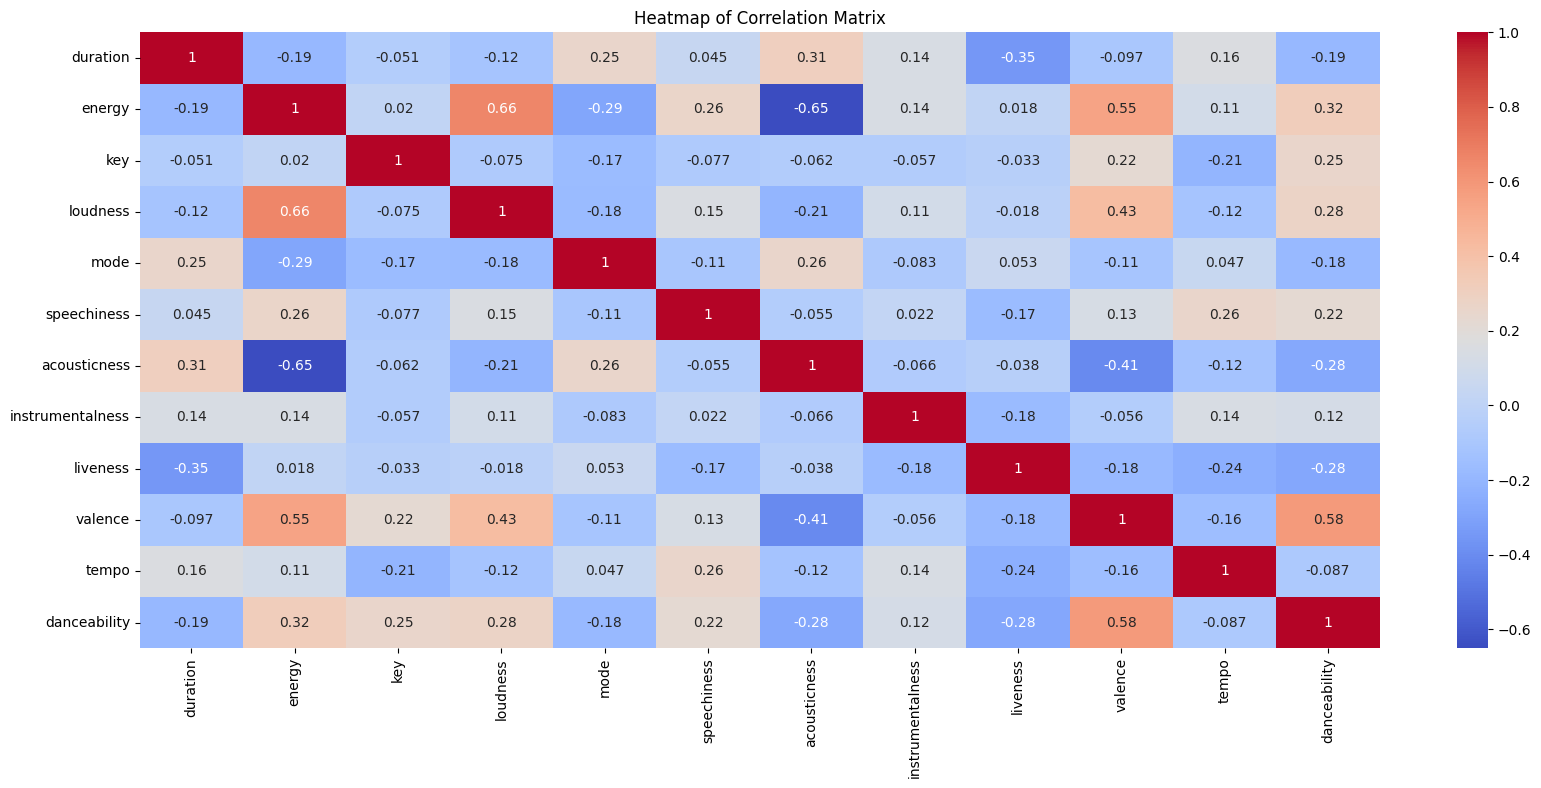

In [9]:
# Menampilkan heatmap korelasi antar kolom
corr = spotify_df.corr()
print(corr)

plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

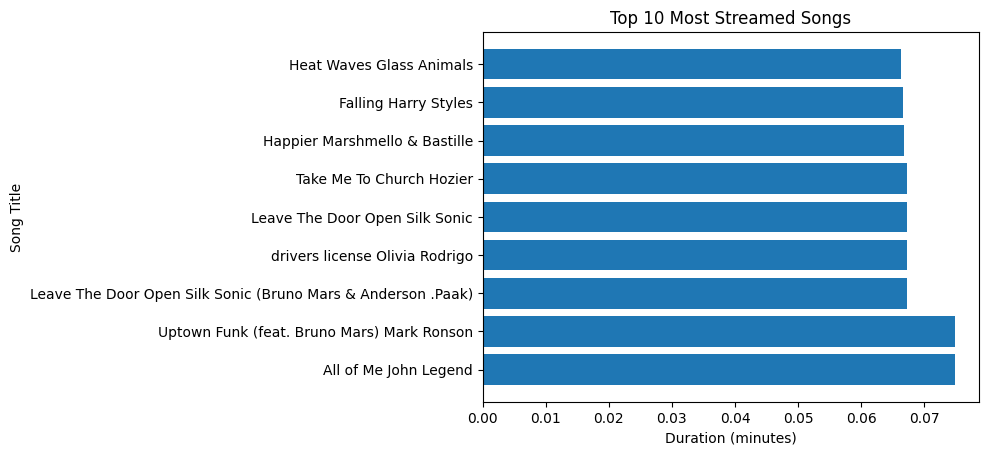

In [51]:
# Bar chart untuk melihat lagu yang paling banyak didengar
top_songs = spotify_df[['name', 'duration']].sort_values(by='duration', ascending=False).head(10)
plt.barh(top_songs['name'], top_songs['duration']/60) # konversi detik ke menit
plt.title('Top 10 Most Streamed Songs')
plt.xlabel('Duration (minutes)')
plt.ylabel('Song Title')
plt.show()

In [55]:
# Import library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Ambil kolom yang digunakan untuk content-based filtering
features = spotify_df[['duration', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability']].values

# Normalisasi data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Hitung similarity matrix
similarity_matrix = cosine_similarity(features)

# Index dari lagu yang ingin direkomendasikan
song_index = 0

# Ambil 10 lagu dengan similarity tertinggi
similar_songs = list(enumerate(similarity_matrix[song_index]))
sorted_similar_songs = sorted(similar_songs,key=lambda x:x[1],reverse=True)[1:11]

print(similar_songs)
print(sorted_similar_songs)

[(0, 1.0), (1, 0.8237553066988801), (2, 0.7496243362853523), (3, 0.5293823082865929), (4, 0.6450488580207874), (5, 0.5103597882375837), (6, 0.8361070009243727), (7, 0.8206682785213174), (8, 0.5087833262597776), (9, 0.7344148310816303), (10, 0.8647170270097867), (11, 0.7009166789872473), (12, 1.0), (13, 0.7699341838393725), (14, 0.8614157029969987), (15, 0.9199214180200651), (16, 0.7211643090771174), (17, 0.6801567708522942), (18, 0.5527262491212407), (19, 0.6567388733302553), (20, 0.7019953542911421), (21, 1.0), (22, 0.8525257633959039), (23, 0.8873855490418212), (24, 0.7772191041337545), (25, 0.5361695475460377), (26, 0.6985610802602815), (27, 0.7496243362853523), (28, 0.8776820022293013), (29, 0.43315954581165217), (30, 0.6922351697171581), (31, 0.8049180979328094), (32, 0.6358897083588783), (33, 0.48579910520365227), (34, 0.4208192755014052), (35, 0.8975787568011964), (36, 0.6643055615783662), (37, 0.9499708129428244), (38, 0.843538234697488), (39, 0.8539636921829452), (40, 0.801237